# Produce a surf report

A `pysurfline.SurfReport` objects inherit from a simple `pysurfline.SpotForecast` object and features additional reporting functionalities, such as plotting methods and easily readable outputs.

In [85]:
%load_ext autoreload
%autoreload 2

from pysurfline import SpotForecast
from pysurfline import SurfReport

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


List of known spot id

| Spot Id | Name |
|---|---|
| 5842041f4e65fad6a7708890 | Pipeline (USA)|
| 584204204e65fad6a7709b09 | Varazze (ITA)|
| 5842041f4e65fad6a7708b4b | Uluwatu (IDN)
| 5842041f4e65fad6a7708c8e | La Graviere (FRA)|

Initializing a `SurfReport` objects does nothing else than calling a `SpotForecast` object with the specified `params` for specifying the desired response by the Surfline API. 

In [86]:
params = {
    "spotId": "5842041f4e65fad6a7708c8e",
    "days": 3,
    "intervalHours": 3,
}
report = SurfReport(params)
report.api_log


['ForecastGetter(Type:wave, Status:200)',
 'ForecastGetter(Type:wind, Status:200)',
 'ForecastGetter(Type:tides, Status:200)',
 'ForecastGetter(Type:weather, Status:200)']

This object has the `df` attribute to easily inspect the hourly data fetched from the Surfline servers.

In [87]:
report.df.head()

,utcOffset,surf_min,surf_max,surf_optimalScore,swells,utcOffset,speed,direction,directionType,gust,optimalScore,utcOffset,temperature,condition
timestamp,,,,,,,,,,,,,,
2022-02-13 23:00:00,1,1.64,1.94,2,"[{'height': 3.21174, 'period': 12, 'direction'...",1,41.42211,241.99007,Onshore,60.85301,0,1,13.45062,NIGHT_LIGHT_SHOWERS
2022-02-14 02:00:00,1,2.75,2.91,2,"[{'height': 0, 'period': 0, 'direction': 0, 'd...",1,36.90876,271.42224,Onshore,49.35668,0,1,10.88586,NIGHT_LIGHT_SHOWERS_POSSIBLE
2022-02-14 05:00:00,1,2.02,2.32,2,"[{'height': 0, 'period': 0, 'direction': 0, 'd...",1,42.58844,267.45522,Onshore,53.64000,0,1,10.64890,NIGHT_BRIEF_SHOWERS_POSSIBLE
2022-02-14 08:00:00,1,2.08,2.38,2,"[{'height': 0, 'period': 0, 'direction': 0, 'd...",1,46.10164,266.49189,Onshore,56.94576,0,1,10.64856,LIGHT_SHOWERS_POSSIBLE
2022-02-14 11:00:00,1,2.27,2.57,2,"[{'height': 0, 'period': 0, 'direction': 0, 'd...",1,50.14835,265.29555,Onshore,60.16227,0,1,11.03421,BRIEF_SHOWERS_POSSIBLE


Moreover, a simplified version of the dataframe is available with the `surf` attribute. This represents the surf data that is actually plotted.

In [88]:
report.surf.head()

,surf_min,surf_max,speed,directionType,direction
timestamp,,,,,
2022-02-13 23:00:00,1.64,1.94,41.42211,Onshore,241.99007
2022-02-14 02:00:00,2.75,2.91,36.90876,Onshore,271.42224
2022-02-14 05:00:00,2.02,2.32,42.58844,Onshore,267.45522
2022-02-14 08:00:00,2.08,2.38,46.10164,Onshore,266.49189
2022-02-14 11:00:00,2.27,2.57,50.14835,Onshore,265.29555


Lets then call the `plot()` method, that returns a `matplotlib` figure representing the minimum and maximum surf size that is forecasted for the spot.

Additionally, the daylight hours are shown in the plot, with darkgrey representing night and lightgrey representing dusk and dawn.

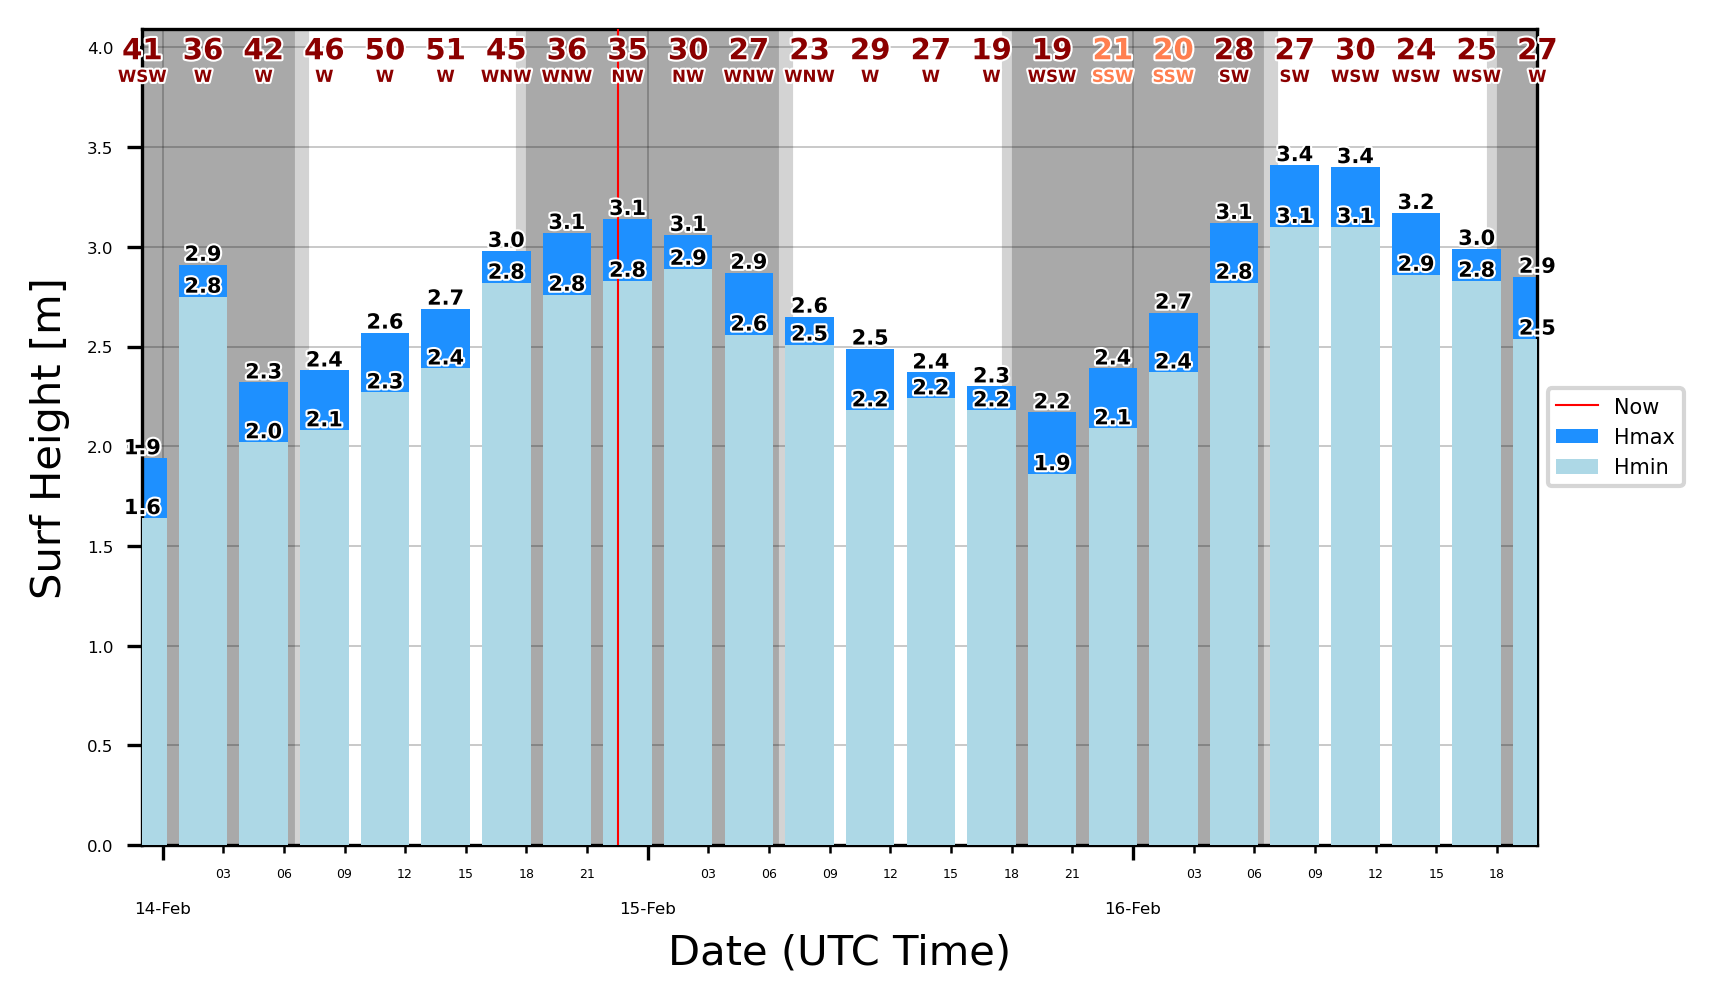

In [89]:
f=report.plot()